In [37]:
import numpy as np
from scipy.io import wavfile
from matplotlib import pyplot as plt
from scipy.fft import rfft, rfftfreq
from scipy.signal import butter, lfilter, freqz
from scipy.signal import butter,filtfilt

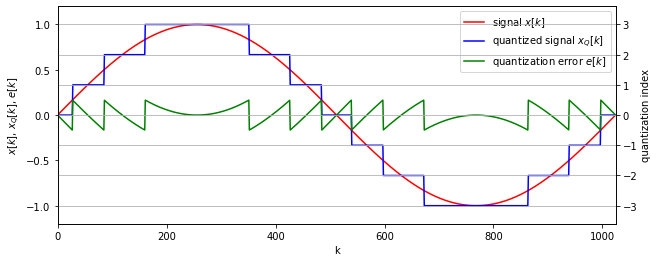

In [15]:


N = 1024  # length of signal

# generate signal
x = np.sin(2 * np.pi / N * np.arange(N))
# quantize signal
xi = np.round(3 * x)
xQ = 1 / 3 * xi
e = xQ - x

# plot (quantized) signals
fig, ax1 = plt.subplots(figsize=(10, 4))
ax2 = ax1.twinx()

ax1.plot(x, "r", label=r"signal $x[k]$")
ax1.plot(xQ, "b", label=r"quantized signal $x_Q[k]$")
ax1.plot(e, "g", label=r"quantization error $e[k]$")
ax1.set_xlabel("k")
ax1.set_ylabel(r"$x[k]$, $x_Q[k]$, $e[k]$")
ax1.axis([0, N, -1.2, 1.2])
ax1.legend()

ax2.set_ylim([-3.6, 3.6])
ax2.set_ylabel("quantization index")
ax2.grid()


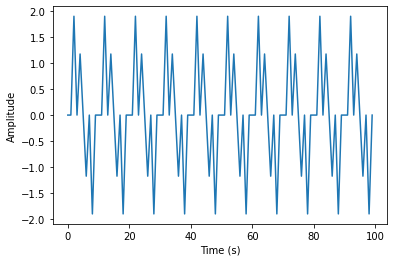

In [45]:
SAMPLE_RATE = 100
DURATION = 1

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate*duration, endpoint=False)
    frequencies = x*freq
    y = np.sin((2*np.pi)*frequencies)
    return x, y

x1, tone1 = generate_sine_wave(10, SAMPLE_RATE, DURATION)
x2, tone2 = generate_sine_wave(60, SAMPLE_RATE, DURATION)
tone3 = tone1+tone2
# plt.plot(x1[0:1000], tone1[0:1000])
# plt.plot(tone1)
plt.plot(tone3)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

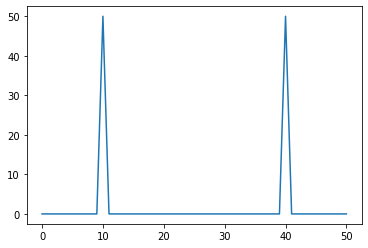

In [46]:
N = SAMPLE_RATE * DURATION
yf = rfft(tone3)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

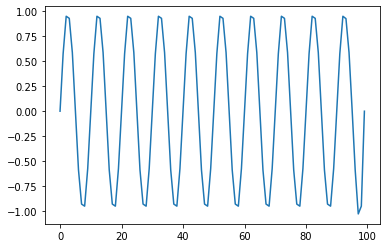

In [62]:

def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Filter requirements.
order = 2       # sin wave can be approx represented as quadratic
cutoff = SAMPLE_RATE/4

y = butter_lowpass_filter(tone3, cutoff, SAMPLE_RATE, order)
plt.plot(y)
plt.show()


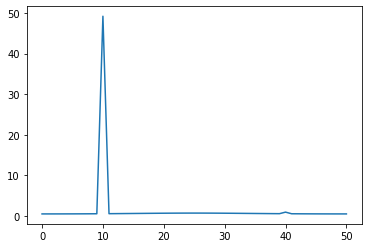

In [63]:
N = SAMPLE_RATE * DURATION
yf = rfft(y)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()